# School of AI - São Paulo
## Aula - Naive Bayes
## Prof. Esp Victor Venites
## Data: 26/03/2019
---------------------------------------------------------------------------------------

# Exemplo Sol/Chuva com Jogo

In [1]:
# School of AI SP - Aprendizagem de Máquina - 26/03/2018

# Imports Diversos

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.style as style
%matplotlib inline

In [2]:
# Parte 1 - Dados
tempo = {
        'Tempo': ['Sunny', 'Overcast', 'Rainy', 'Sunny', 'Sunny'
                  , 'Overcast', 'Rainy'
                  , 'Rainy', 'Sunny', 'Rainy', 'Sunny'
                  , 'Overcast', 'Overcast', 'Rainy'],
        'Jogo': ['No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No'
                 , 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No']}
tempo = pd.DataFrame(data=tempo)
tempo

,Jogo,Tempo
0,No,Sunny
1,Yes,Overcast
2,Yes,Rainy
3,Yes,Sunny
4,Yes,Sunny
5,Yes,Overcast
6,No,Rainy
7,No,Rainy
8,Yes,Sunny
9,Yes,Rainy


In [3]:
# Parte 2 - Tabela de Frequencia
Tabela_Frequencia = pd.crosstab(tempo["Tempo"], tempo["Jogo"]).copy()
Tabela_Frequencia.loc["Total"] = Tabela_Frequencia.sum()
Tabela_Frequencia

Jogo,No,Yes
Tempo,,
Overcast,0,4
Rainy,3,2
Sunny,2,3
Total,5,9


In [4]:
# Parte 3 - Tabela de Probabilidade (Likehood)
Tabela_Probabilidade = Tabela_Frequencia.copy()
Tabela_Probabilidade.loc["Frequencia"] = Tabela_Probabilidade.loc["Total"]/len(tempo)
Tabela_Probabilidade.insert(loc=2, column="Total", value=(Tabela_Frequencia["No"]+Tabela_Frequencia["Yes"]))
Tabela_Probabilidade.insert(loc=3, column="Frequencia", value=Tabela_Probabilidade["Total"]/len(tempo))
Tabela_Probabilidade

Jogo,No,Yes,Total,Frequencia
Tempo,,,,
Overcast,0.000000,4.000000,4.0,0.285714
Rainy,3.000000,2.000000,5.0,0.357143
Sunny,2.000000,3.000000,5.0,0.357143
Total,5.000000,9.000000,14.0,1.000000
Frequencia,0.357143,0.642857,NaN,NaN


In [5]:
#P (Sim | Sol) = P (Sol | Sim) * P (Sim) / P (Sol);
P_Sol_Sim = Tabela_Probabilidade.loc["Sunny"]["Yes"]
P_Sim = Tabela_Probabilidade.loc["Frequencia"]["Yes"]
P_Sol = Tabela_Probabilidade.loc["Sunny"]["Frequencia"]
P_Sim_Sol = P_Sol_Sim * P_Sim / P_Sol
P_Sim_Sol

5.4

------------------------------------------------------------------
# Modelo Previsão 
## Previsão por classificação

In [6]:
datasetCancer = pd.read_csv('breastCancer.csv')
datasetCancer.tail(10)

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
689,654546,1,1,1,1,2,1,1,1,8,2
690,654546,1,1,1,3,2,1,1,1,1,2
691,695091,5,10,10,5,4,5,4,4,1,4
692,714039,3,1,1,1,2,1,1,1,1,2
693,763235,3,1,1,1,2,1,2,1,2,2
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [7]:
datasetCancer.describe()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [8]:

dataset = datasetCancer
dataset.replace('?', 0, inplace=True)
dataset = dataset.applymap(np.int64)
X = dataset.iloc[:, 1:-1].values    
y = dataset.iloc[:, -1].values

#For necessário por conta do formato dos dados de entrada
#, com classes marcadas como 2 e 4
# Arbitrado para 0 ou 1, Acontece ou não acontece
# Fronteira separadora
y_new = []
for i in range(len(y)):
    if y[i] == 2:
        y_new.append(0)
    else:
        y_new.append(1)
y_new = np.array(y_new)

# Dividindo nosso dataset em treino e teste 
# pip install -U scikit-learn
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Classificação via Naive Bayes do Sklearn

from sklearn.naive_bayes import GaussianNB
# A Gaussiana é usada para classificaçào e assume-se que segue uma disribuição normal
NB_sk = GaussianNB()
NB_sk.fit(X_train, y_train)

sk_pred = NB_sk.predict(X_test)


In [9]:
#Acurácia
def accuracy(y_tes, y_pred):
    correct = 0
    for i in range(len(y_pred)):
        if(y_tes[i] == y_pred[i]):
            correct += 1
            
    #Quantidade de Acertos
    return (correct/len(y_tes))*100

In [10]:
print("Accuracy for sklearn Naive Bayes Classifier: ",accuracy(y_test, sk_pred), "%")

Accuracy for sklearn Naive Bayes Classifier:  95.42857142857143 %


In [11]:
comparacao = pd.DataFrame(y_test, columns=["Ocorrido"])
comparacao.insert(loc=1, column="Previsao", value=sk_pred)
comparacao.head(10)

,Ocorrido,Previsao
0,2,2
1,2,2
2,2,4
3,2,2
4,4,4
5,2,2
6,4,4
7,2,2
8,4,4
9,4,4


Text(0.5, 1.0, 'Previsao: 95.42857142857143%')

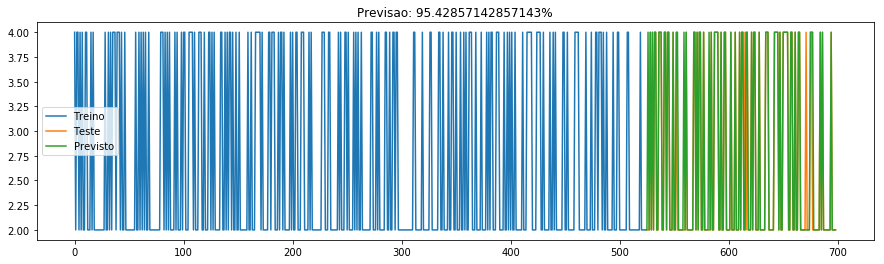

In [12]:
plt.figure(figsize =(15,4))
plt.plot(np.arange(len(y_train)), y_train, label = 'Treino')
plt.plot(np.arange(len(y_train), (len(y_test)+len(y_train)), 1), y_test, label = 'Teste')
plt.plot(np.arange(len(y_train), (len(sk_pred)+len(y_train)), 1), sk_pred, label = 'Previsto')
plt.legend(loc = 'best')
plt.title('Previsao: ' + str(accuracy(y_test, sk_pred)) + '%')

Text(0.5, 1.0, 'Previsao: 95.42857142857143%')

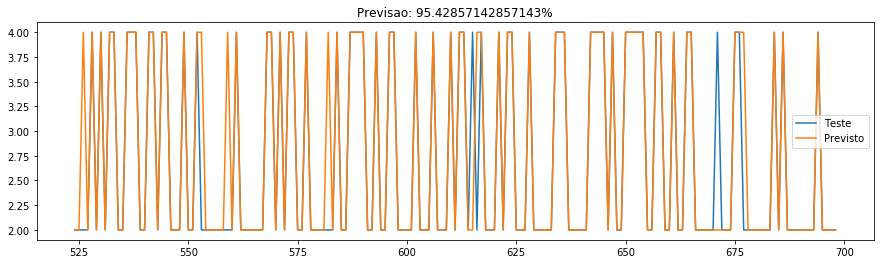

In [13]:
plt.figure(figsize =(15,4))
plt.plot(np.arange(len(y_train), (len(y_test)+len(y_train)), 1), y_test, label = 'Teste')
plt.plot(np.arange(len(y_train), (len(sk_pred)+len(y_train)), 1), sk_pred, label = 'Previsto')
plt.legend(loc = 'best')
plt.title('Previsao: ' + str(accuracy(y_test, sk_pred)) + '%')